# **Pratice Case - Explanatory Data Analysis**
# by : Edwin Sanjaya


## **Scenario**
Looking back at the season that was 2018-2019 and looking to delve into sight deeper insights. Using the data to see how clubs are similar stylistically, in the way they pass, attack and score goals. 

This data set is wide ranging in the sense it encompasses stats seen on a regular league table but goes beyond looking at how teams pass and keep possession, how they defend, tackle as well as looking at market values of a team and how much money each team was allotted from the TV rights deal. 
This data was gathered from 
1) BBC Sports Football, 
2) Premierleague.com 
3) Transfermarkt.co.uk 


## **Data Dictionary**
Team : football club

category : the league club participates in

general_league_position : team position regardless of league

finance _live_games_televised : number of games aired on television

finance _tv_revenue : number income earned from games aired on television

general_matches_played : number of games played

general_won : number of win games

general_draw : number of draw games

general_lost : number of lost games

attack_scored : number of successful attacks scored a goal

defence_goals_conceeded : number of goals conceded

general_goal_difference : number of goal difference from opponent

general_points : number of goal points

general_squad_size : number of players on the team

general_squad_average_age : average number of player's age on the team

general_squad_foreigners : number of foreign players on the team

finance _team_market : number of team market price

finance _market_average : average number of market price

attack_passes : number of passes in an attacking state

attack_passes_through : number of passes in an attacking state

attack_passes_long : number of long passes in an attacking state

attack_passes_back : number of back passes in an attacking state

attack_crosses  : number of cross passes in an attacking state

attack_corners_taken : number of corner kick in an attacking state

attack_shots : number of shots in an attacking state

attack_shots_on_target : number of shots towards goal in an attacking state

attack_goals_headed : number of goals using header in an attacking state

attack_goals_penalty : number of penalty goals in an attacking state

attack_goals_box : number of goals from penalty box in an attacking state

attack_goals_outsidebox : number of goals from outside penalty box in an attacking state

general_card_yellow : number of yellow card received

general_card_red : number of red card received

attack_goals_counter : number of goals made by counterattack

attack_goals_freekick : number of goals made by freekick in an attacking state

defence_saves : number of saves in an defensive state

defence_blocks : number of block in an defensive state

defence_interceptions : number of interception in an defensive state

defence_tackles : number of tackles in an defensive state

defence_tackles_last_man : number of last man tackles in an defensive state

defence_clearances : number of clearance in an defensive state

defence_clearances_headed : number of clearence by header in an defensive state

defence_penalty_conceeded : number of thwart opponent penalty in an defensive state

attack_posession :  ball possesion in an attacking state

attack_pass_accuracy : accuracy of passes in an attacking state


## **Glossary**

Clearances : a player kicks the ball away from the goal they are defending.

Block : used by the goal keeper to knock the ball away with his hands

Interception : a move in football that happens when a player on the defensive team catches a ball from the quarterback instead of the intended receiver.

## **Question and Answer**

### 1. Is this data clean?

In [1]:
# import package
import pandas as pd

In [2]:
# load and examine dataset info including null values
df = pd.read_csv('/content/drive/MyDrive/Fellowship-main/epl_1819.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   category                       20 non-null     object 
 2   general_league_position        20 non-null     int64  
 3   finance _live_games_televised  20 non-null     int64  
 4   finance _tv_revenue            20 non-null     int64  
 5   general_matches_played         20 non-null     int64  
 6   general_won                    20 non-null     int64  
 7   general_draw                   20 non-null     int64  
 8   general_lost                   20 non-null     int64  
 9   attack_scored                  20 non-null     int64  
 10  defence_goals_conceeded        20 non-null     int64  
 11  general_goal_difference        20 non-null     int64  
 12  general_points                 20 non-null     int64

In [3]:
# rename the column that is not written correctly
df = df.rename(columns={'finance _live_games_televised': 'finance_live_games_televised',
                        'finance _tv_revenue' : 'finance_tv_revenue',
                        'finance _team_market' : 'finance_team_market',
                        'finance _market_average' : 'finance_market_average'})

In [4]:
# convert some attribute that have wrong dtype in dataframe
df['defence_clearances'] = df.defence_clearances.str.split(',').str.join('').astype(int)
df['attack_passes_back'] = df.attack_passes_back.str.split(',').str.join('').astype(int)
df['attack_passes_long'] = df.attack_passes_long.str.split(',').str.join('').astype(int)
df['attack_passes'] = df.attack_passes.str.split(',').str.join('').astype(int)

In [5]:
# check for duplicate
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

### 2. How is the point distribution of the epl team? and which team is an anomaly?

In [6]:
# import visualization package
import seaborn as sns
import matplotlib.pyplot as plt

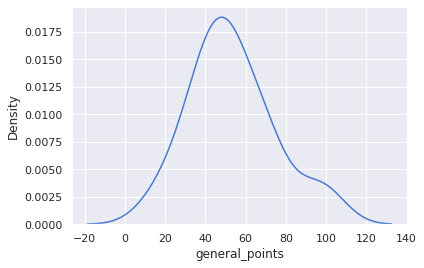

In [7]:
# density plot visualization of general_points attribute
sns.set(style="darkgrid", palette="muted", color_codes=True)
sns.kdeplot(df.general_points)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


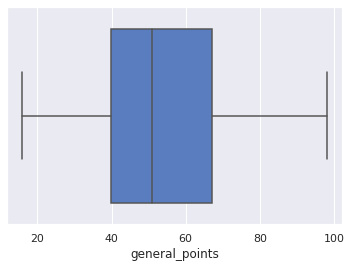

In [8]:
# boxplot visualization of general_points attribute
sns.boxplot(df.general_points)

### 3.	Which team has the best attack? 

In [9]:
# top 5 team based on scoring percentage(attempted shots that resulted in a goal )
df['scoring_percentage'] = df['attack_scored']/df['attack_shots']*100
df[['Team', 'scoring_percentage']].sort_values(by=['scoring_percentage'], ascending=False).head()

,Team,scoring_percentage
4,Arsenal,15.631692
1,Liverpool,15.478261
0,Manchester City,13.909224
13,Bournemouth,12.556054
14,Burnley,12.500000


In [10]:
# top 5 team based on shots target percentage(attempted shots that nicely aimed)
df['shots_target_percentage'] = df['attack_shots_on_target']/df['attack_shots']*100
df[['Team', 'shots_target_percentage']].sort_values(by=['shots_target_percentage'], ascending=False).head()

,Team,shots_target_percentage
5,Manchester United,42.775665
1,Liverpool,39.304348
0,Manchester City,38.067350
13,Bournemouth,36.547085
4,Arsenal,36.402570


In [11]:
# top 5 team based on games won percentage
df['games_won_percentage'] = df['general_won']/df['general_matches_played']*100
df[['Team', 'games_won_percentage']].sort_values(by=['games_won_percentage'], ascending=False).head()

,Team,games_won_percentage
0,Manchester City,84.210526
1,Liverpool,78.947368
3,Tottenham,60.526316
2,Chelsea,55.263158
4,Arsenal,55.263158


In [12]:
# top 5 team based on ball posession while attacking
df[['Team', 'attack_posession']].sort_values(by=['attack_posession'], ascending=False).head()

,Team,attack_posession
0,Manchester City,64.0
2,Chelsea,59.9
1,Liverpool,58.8
3,Tottenham,56.7
4,Arsenal,56.1


In [13]:
# top 5 team based on 
df[['Team', 'attack_pass_accuracy']].sort_values(by=['attack_pass_accuracy'], ascending=False).head()

,Team,attack_pass_accuracy
0,Manchester City,89.0
2,Chelsea,87.6
1,Liverpool,84.4
4,Arsenal,83.3
3,Tottenham,83.2


### 4. Which team has the best defence? 

In [14]:
# top 5 team based on goals conceeded
df[['Team', 'defence_goals_conceeded']].sort_values(by=['defence_goals_conceeded'], ascending=False).head()

,Team,defence_goals_conceeded
18,Fulham,81
19,Huddersfield,76
13,Bournemouth,70
17,Cardiff,69
14,Burnley,68


In [15]:
# top 5 team based on interceptions
df[['Team', 'defence_interceptions']].sort_values(by=['defence_interceptions'], ascending=False).head()

,Team,defence_interceptions
15,Southampton,548
19,Huddersfield,530
17,Cardiff,528
12,Newcastle,506
6,Wolverhampton,501


In [16]:
# top 5 team based on clearances
df[['Team', 'defence_clearances']].sort_values(by=['defence_clearances'], ascending=False).head()

,Team,defence_clearances
12,Newcastle,1120
14,Burnley,1080
15,Southampton,1068
13,Bournemouth,1019
17,Cardiff,978


In [17]:
# top 5 team based on draw percentages
df['games_draw_percentage'] = df['general_draw']/df['general_matches_played']*100
df[['Team', 'games_draw_percentage']].sort_values(by=['games_draw_percentage'], ascending=False).head()

,Team,games_draw_percentage
15,Southampton,31.578947
2,Chelsea,23.684211
16,Brighton,23.684211
5,Manchester United,23.684211
6,Wolverhampton,23.684211


### 5.	Which team is good in the financial aspect? 

In [18]:
# calculate team market value - tv revenue
df['finance'] = df['finance_team_market'] - df['finance_tv_revenue']
df[['Team', 'finance']].sort_values(by=['finance'], ascending=False)

,Team,finance
0,Manchester City,852213645
1,Liverpool,684014854
2,Chelsea,633429784
3,Tottenham,590009199
4,Arsenal,559606820
5,Manchester United,407927132
6,Wolverhampton,242434886
7,Everton,176756095
8,Leicester,160911922
10,Watford,115344473
